This notebook presents ths SIRH model, which is a variation of the SIRD model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./models/')
from SIRH import *
import os

C:\Users\grego\AppData\Local\Temp\ipykernel_4728\2928897298.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\grego\Documents\code\covid_internship\models\SIRH.py:318: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(vars)==reach, str(len(vars)) + 'different from ' + str(reach))


In [2]:
df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])

In [3]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([n_hospitalized, n_infectious, mobility_smoothed])

In [4]:
s_0=1000000 -1
i_0=1
r_0=0
h_0=0
t=len(n_hospitalized)
dt=0.001
split=250
data_train=np.array([n_hospitalized[:split], n_infectious[:split], mobility_smoothed[:split]])

The next cells compare the predictions of the 4 different SIRH models 

gamma_i and gamma_h constants


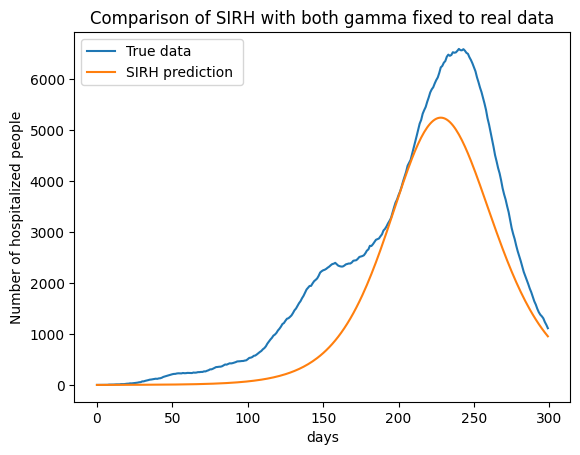

delta-method


/users/eleves-a/2021/gregoire.bechade/code_remote/.venv/lib64/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/users/eleves-a/2021/gregoire.bechade/code_remote/.venv/lib64/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


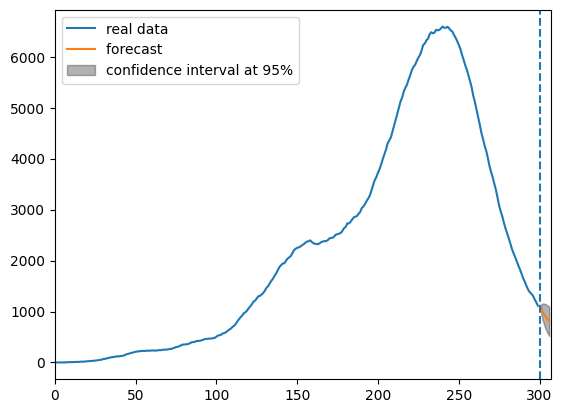

In [5]:
SIRH=SIRH_model_2()
SIRH.choose_model(True, True, True)
SIRH.train( n_hospitalized[:split])
S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH.beta,SIRH.gamma_i, SIRH.gamma_h, SIRH.h, split, dt)
plt.plot(n_hospitalized[:split], label='True data')
plt.plot(H, label = 'SIRH prediction ')
plt.xlabel('days')
plt.ylabel('Number of hospitalized people')
plt.title('Comparison of SIRH with both gamma fixed to real data')
plt.legend()
plt.show()
%matplotlib inline
SIRH.plot(7, 0.05)

on fixe gamma_h mais pas gamma_i


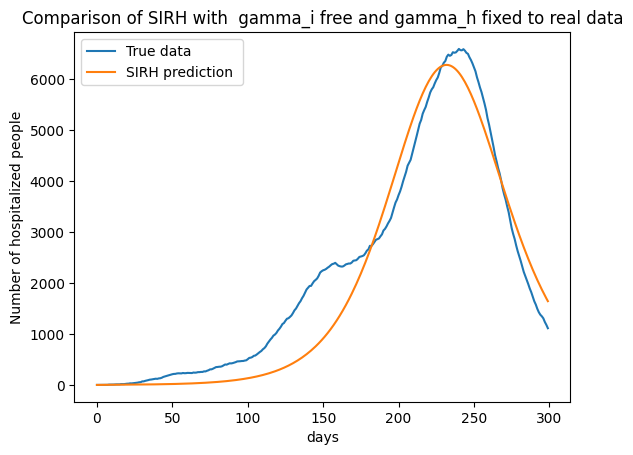

delta-method


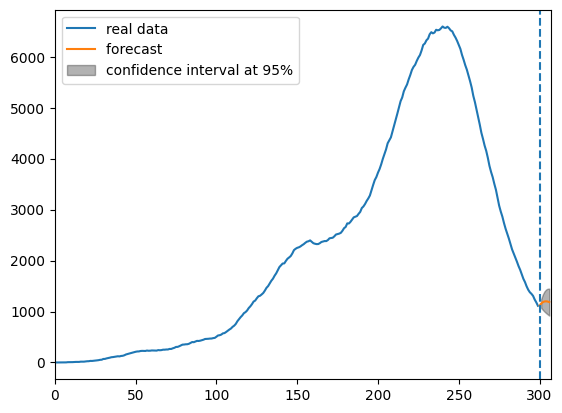

In [6]:
SIRH_bis=SIRH_model_2()
SIRH_bis.choose_model(False, True, True)
SIRH_bis.train( n_hospitalized[:split])
S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH_bis.beta,SIRH_bis.gamma_i, SIRH_bis.gamma_h, SIRH_bis.h, split, dt)
plt.plot(n_hospitalized[:split], label='True data')
plt.plot(H, label = 'SIRH prediction ')
plt.xlabel('days')
plt.ylabel('Number of hospitalized people')
plt.title('Comparison of SIRH with  gamma_i free and gamma_h fixed to real data')
plt.legend()
plt.show()
%matplotlib inline
SIRH_bis.plot(7, 0.05)

gamma_i not constant and gamma_h not constant 


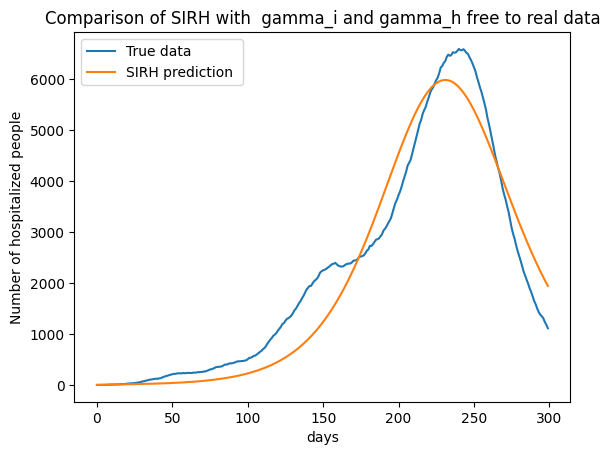

delta-method


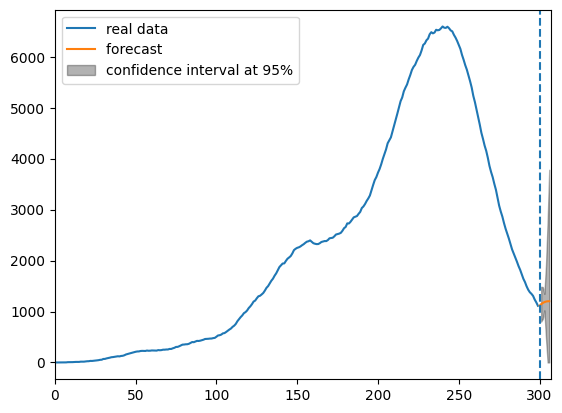

In [7]:
SIRH_ter = SIRH_model_2()
SIRH_ter.choose_model(False, False, True)
SIRH_ter.train( n_hospitalized[:split])
S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH_ter.beta,SIRH_ter.gamma_i, SIRH_ter.gamma_h, SIRH_ter.h, split, dt)
plt.plot(n_hospitalized[:split], label='True data')
plt.plot(H, label = 'SIRH prediction ')
plt.xlabel('days')
plt.ylabel('Number of hospitalized people')
plt.title('Comparison of SIRH with  gamma_i and gamma_h free to real data')
plt.legend()
plt.show()
%matplotlib inline
SIRH_ter.plot(7, 0.05)

on fixe gamma_i mais pas gamma_h


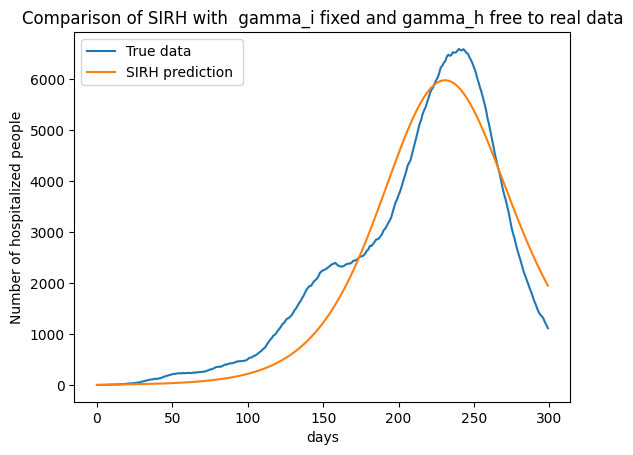

delta-method


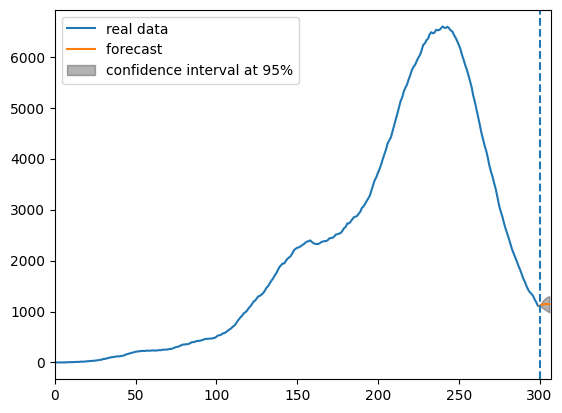

In [8]:
SIRH_quater = SIRH_model_2()
SIRH_quater.choose_model(True, False, True)
SIRH_quater.train( n_hospitalized[:split])
S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH_quater.beta,SIRH_quater.gamma_i, SIRH_quater.gamma_h, SIRH_quater.h, split, dt)
plt.plot(n_hospitalized[:split], label='True data')
plt.plot(H, label = 'SIRH prediction ')
plt.xlabel('days')
plt.ylabel('Number of hospitalized people')
plt.title('Comparison of SIRH with  gamma_i fixed and gamma_h free to real data')
plt.legend()
plt.show()
%matplotlib inline
SIRH_quater.plot(7, 0.05)




In [10]:
for model in [ SIRH, SIRH_bis, SIRH_ter, SIRH_quater]: 
    print( model.beta, model.gamma_i, model.gamma_h, model.h)

0.4296019590476794 0.2 0.2 0.18434775072196238
0.6093898519214609 1.0523065110029069e-14 0.2 0.569180086304972
0.9478223129261791 3.7019696054144263e-10 0.10856610968717187 0.9118666135797313
0.9433012594368432 0.2 0.08645158543447953 0.7068188945129154
